In [20]:
import matplotlib.pyplot as plt
import numpy as np
import math
# Title: zgeo

class Point3d:
    x: str = 0
    y: int = 4
    z: int = 8

    def __init__(self, x,y,z):
        self.x = x
        self.y = y
        self.z = z
    
    def __str__(self):
        return "Point3d(" + str(self.x) + ", " + str(self.y) + ", " + str(self.z) + ")"

    def __repr__(self):
        return "Point3d(" + str(self.x) + ", " + str(self.y) + ", " + str(self.z) + ")"
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y and self.z == other.z
    def __ne__(self, other):
        return not self.__eq__(other)
    def __hash__(self):
        return hash((self.x, self.y, self.z))
    def __add__(self, other):
        return Point3d(self.x + other.x, self.y + other.y, self.z + other.z)
    def __sub__(self, other):
        return Point3d(self.x - other.x, self.y - other.y, self.z - other.z)
    def __mul__(self, other):
        return Point3d(self.x * other, self.y * other, self.z * other) 
    def __truediv__(self, other):
        return Point3d(self.x / other, self.y / other, self.z / other)
    def __floordiv__(self, other):
        return Point3d(self.x // other, self.y // other, self.z // other)    



# calculates a 2d fib smoothed curve from
# spline: list of Point3d (only xy are used)
# min_resolution: sets minimum the number of elements
#                   used to calucuate the curve 
#                   additional elements (samples) 
#                   are added as nessasary 
#                   to ensure the curve is smooth
#                   (default 10)
# returns: list of Point3d
def curve_2d(spline, min_resolution = 10):
    curved = []

    x_min, x_max, y_min, y_max = range_2d(spline)
    

    # calculate the number of samples needed
    # to ensure the curve is smooth
    samples = 0
    for i in range(len(spline) - 1):
        p1 = spline[i]
        p2 = spline[i + 1]
        samples += max(abs(p1.x - p2.x), abs(p1.y - p2.y))
    samples = max(samples, min_resolution)

    # calculate the curve
    for i in range(samples):
        t = i / samples
        curved.append(fib_2d(spline, t))

    return curved

def binomial(n, i):
    return factorial(n) / (factorial(i) * factorial(n - i))

def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)

def fib_2d(spline, t):
    u = 1 - t
    n = len(spline) - 1
    x = 0
    y = 0
    for i in range(n + 1):
        b = binomial(n, i)
        x += b * u**(n - i) * t**i * spline[i].x
        y += b * u**(n - i) * t**i * spline[i].y
    return Point3d(x, y, 0)

def range_2d(spline):
    x_min = 0
    x_max = 0
    y_min = 0
    y_max = 0

    for p in spline:
        if p.x < x_min:
            x_min = p.x
        if p.x > x_max:
            x_max = p.x
        if p.y < y_min:
            y_min = p.y
        if p.y > y_max:
            y_max = p.y

    return x_min, x_max, y_min, y_max



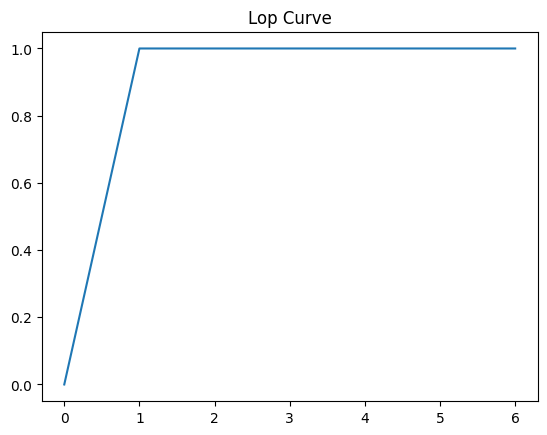

[Point3d(0.0, 0.0, 0),
 Point3d(0.6000000000000001, 0.4685590000000001, 0),
 Point3d(1.2000000000000002, 0.7378560000000002, 0),
 Point3d(1.7999999999999996, 0.8823509999999998, 0),
 Point3d(2.4000000000000004, 0.953344, 0),
 Point3d(3.0, 0.984375, 0),
 Point3d(3.6000000000000005, 0.9959040000000001, 0),
 Point3d(4.199999999999999, 0.999271, 0),
 Point3d(4.800000000000001, 0.9999359999999999, 0),
 Point3d(5.4, 0.9999989999999999, 0)]

In [21]:
lop_curve =  (Point3d(0,0,0),Point3d(1,1,0),Point3d(2,1,0),Point3d(3,1,0),Point3d(4,1,0),Point3d(5,1,0),Point3d(6,1,0))
#whip_curve = Point3d[(0,1),(1,1),(1,1),(1,1),(1,-10)]
# may support z axis curves time permitting
#z_curve =  Point3d[(0,0,.5),  ]

x = []
y = []
for p in lop_curve:
    x.append(p.x)
    y.append(p.y)
plt.plot(x, y)
plt.title("Lop Curve")
plt.show()


min_resolution = 10
curve_2d(lop_curve, min_resolution)

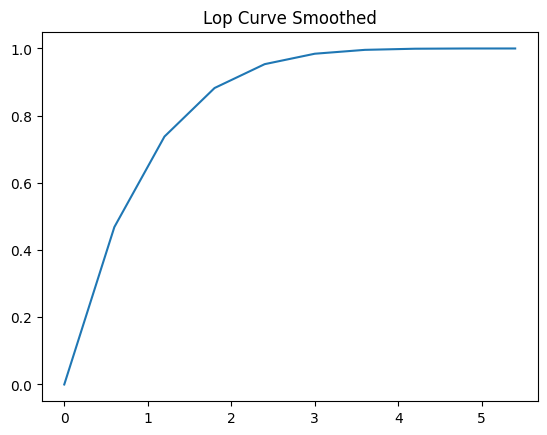

In [22]:
#plot the curve
x = []
y = []
for p in curve_2d(lop_curve, min_resolution):
    x.append(p.x)
    y.append(p.y)
plt.plot(x, y)
plt.title("Lop Curve Smoothed")
plt.show()
